In [1]:
import sys
sys.path.append("bhar544/Software/pysingfel/")

import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import pysingfel as ps
import time

In [2]:
# Create a particle object
particle = ps.Particle()

particle.read_pdb('../../../SASDAC2_LysozymeNaCOOH/SASDAC2_fit1_model1.pdb', ff='WK')

# Load beam
beam = ps.Beam('../input/exp_chuck.beam') 

# Load and initialize the detector
det = ps.PnccdDetector(geom = '../lcls/amo86615/PNCCD::CalibV1/Camp.0:pnCCD.1/geometry/0-end.data', beam = beam)

# Create a 2D pattern

In [3]:
particle.rotate_randomly()

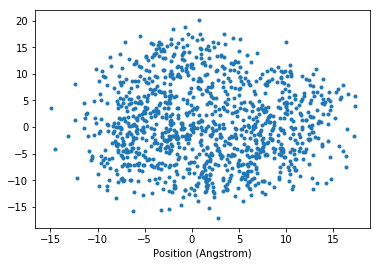

In [4]:
plt.plot(particle.atom_pos[:,0]*1e10,particle.atom_pos[:,1]*1e10,'.'); 
plt.xlabel('Position (Angstrom)')
plt.show()

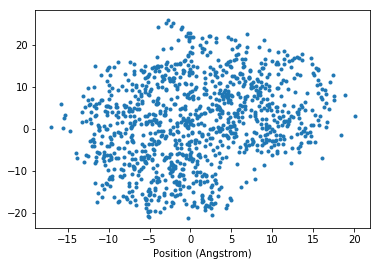

In [5]:
plt.plot(particle.atom_pos[:,1]*1e10,particle.atom_pos[:,2]*1e10,'.');
plt.xlabel('Position (Angstrom)')
plt.show()

In [6]:
tic = time.time()
#pattern = det.get_photons(device='gpu', particle=particle, return_type="complex_field")
raw_pattern_1 = det.get_pattern_without_corrections(particle=particle, device='gpu', return_type="complex_field")
int_pattern_1 = np.abs(raw_pattern_1) ** 2
pattern_1 = det.add_correction_and_quantization(int_pattern_1)
toc = time.time()
print("It takes {:.2f} seconds to finish the calculation.".format(toc-tic))

ff:  (4, 101)
It takes 1.01 seconds to finish the calculation.


In [7]:
particle.rotate_randomly()

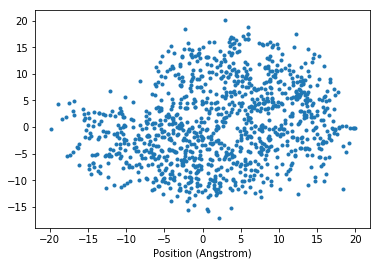

In [8]:
plt.plot(particle.atom_pos[:,0]*1e10,particle.atom_pos[:,1]*1e10,'.'); 
plt.xlabel('Position (Angstrom)')
plt.show()

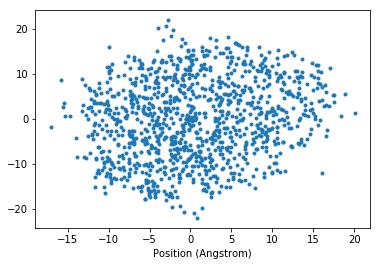

In [9]:
plt.plot(particle.atom_pos[:,1]*1e10,particle.atom_pos[:,2]*1e10,'.');
plt.xlabel('Position (Angstrom)')
plt.show()

In [10]:
tic = time.time()
#pattern = det.get_photons(device='gpu', particle=particle, return_type="complex_field")
raw_pattern_2 = det.get_pattern_without_corrections(particle=particle, device='gpu', return_type="complex_field")
int_pattern_2 = np.abs(raw_pattern_2) ** 2
pattern_2 = det.add_correction_and_quantization(int_pattern_2)
toc = time.time()
print("It takes {:.2f} seconds to finish the calculation.".format(toc-tic))

ff:  (4, 101)
It takes 0.44 seconds to finish the calculation.


# Show the field

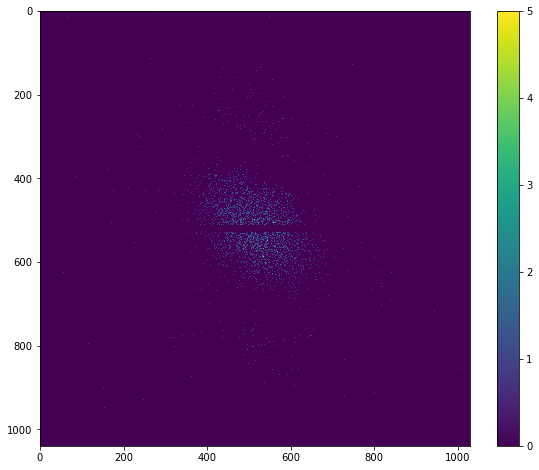

In [11]:
fig = plt.figure(figsize=(10, 8))

plt.imshow(det.assemble_image_stack(pattern_1),vmin=0, vmax=5)
plt.colorbar()
plt.show()

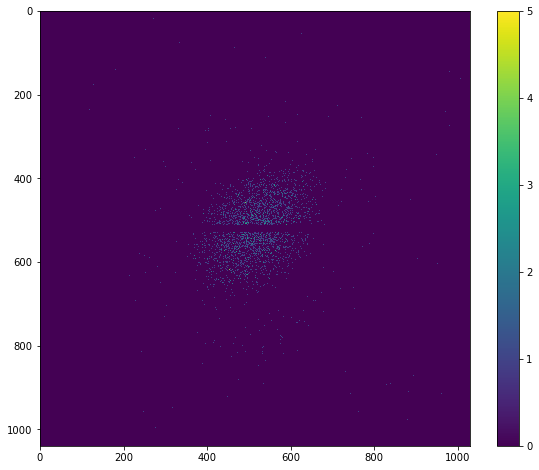

In [12]:
fig = plt.figure(figsize=(10, 8))

plt.imshow(det.assemble_image_stack(pattern_2),vmin=0, vmax=5)
plt.colorbar()
plt.show()

In [13]:
double_raw_pattern = raw_pattern_1 + raw_pattern_2
int_pattern = np.abs(double_raw_pattern) ** 2
pattern = det.add_correction_and_quantization(int_pattern)

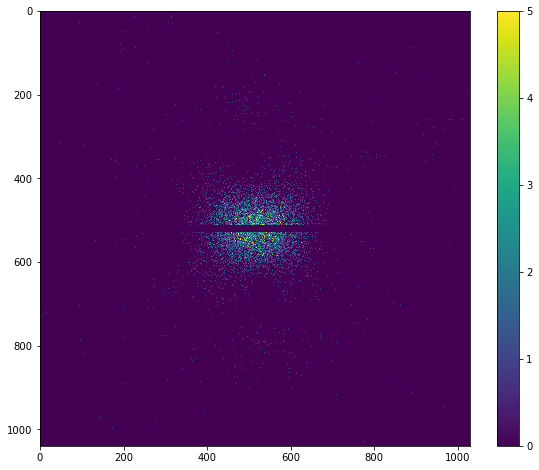

In [14]:
fig = plt.figure(figsize=(10, 8))

plt.imshow(det.assemble_image_stack(pattern),vmin=0, vmax=5)
plt.colorbar()
plt.show()